# Measures of Association I: Correlations

## Measures of Association: Definitions
* continuous variable: can take on any value within some range
    * appropriate tests: regression, parametric/non-parametric measures of correlation
* categorical: corresponds to distinct categories
    * appropriate test: chi-squared

* correlation: measures linear relationship between two randomly sampled cont. variables
* regression: measures linear relationship between two cont. variables, but you choose/fix one variable (the independent variable)

## Parametric Correlation Coefficient
### definitions
**pearson's corr. coeff.**
* quantifies strength of correlation on a -1 to 1 scale
* higher abs. value of pearson's corr. coeff. = stronger/tighter association, and more predicitve
* parametric b/c it assumes that two random variables (X, Y) are normally distributed

### computing for a population (idealized)
covariance of X, Y normalized to the product of their individual st. devs.

### computing for a sample (real data)
* denoted as r, and use sample stats

### coefficient of determination (fraction of explained variance)
* computed when one variable (X) is independent/manipulated, and another variable (Y) is dependent/random
* denoted as r^2, and quantifies total variabion in Y that is explained by regression line with respect to X

### St. error of sample Pearson's corr. coeff.
* st. error of r computed assuming r follows student's t-distribution with 2 df (2 variables)

### Confidence intervals for sample Pearson's corr. coeff.
* 

### Hypothesis testing on sample Pearson's corr. coeff.
* Ho: r = 0 
    * null distrb. centered at r = 0
    * distrb around the mean is symmereic, and mean follows student's t-distrb
    * test stat is t statistic
* Ho: r = rs (rs does not equal 0)
    * null distrb. not centered at r = 0, and not symmetric, and not following t distrb
    * therefore, comput z transformation of r and rs

### Exercises
1) plot X vs. Y. Do they look related?


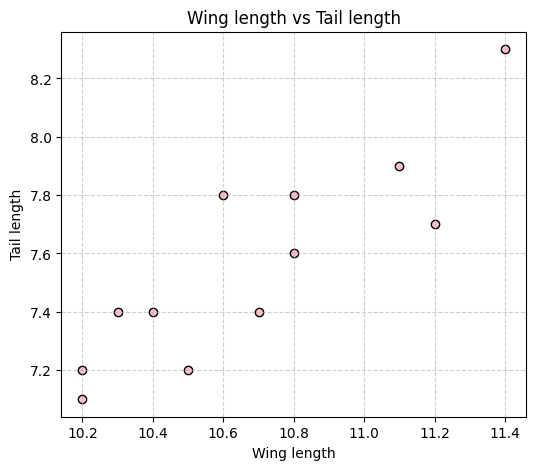

In [ ]:
import matplotlib.pyplot as plt

# Data
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(wing_length, tail_length, color='pink', edgecolor='black')

# Labels and title
plt.xlabel("Wing length")
plt.ylabel("Tail length")
plt.title("Wing length vs Tail length")

# add grid
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

## yes, there seems to be a positive correlation between X and Y


2) Calculate r X, Y and r Y, X, first using the equations above and then using the Python numpy function corrcoef. Did you get the same answers?

In [6]:
# r X, Y

## Data
X = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
Y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

## Step 1: compute means
mean_x = sum(X) / len(X)
mean_y = sum(Y) / len(Y)

### Step 2: compute numerator (sum of products of deviations)
numerator = sum((x - mean_x) * (y - mean_y) for x, y in zip(X, Y))

# Step 3: compute denominator (sqrt of product of sums of squared deviations)
denominator = (sum((x - mean_x)**2 for x in X) * sum((y - mean_y)**2 for y in Y))**0.5

## Step 4: correlation coefficient
r = numerator / denominator

print("Sample Pearson correlation coefficient (r):", r)

# using numpy's function corrcoef
import numpy as np

# Data
X = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
Y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

## Compute correlation matrix
corr_matrix = np.corrcoef(X, Y)

## Extract Pearson's r (off-diagonal element)
r = corr_matrix[0, 1]

print("Sample Pearson correlation coefficient (r):", r)


Sample Pearson correlation coefficient (r): 0.8703545613058227
Sample Pearson correlation coefficient (r): 0.8703545613058227


3) What is the standard error of r(X, Y)
   The 95% confidence intervals computed from the standard error?

In [11]:
import numpy as np

# Data
X = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
Y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

n = len(X)

# Compute Pearson's r
r = np.corrcoef(X, Y)[0, 1]

# Fisher's z transformation
z = np.arctanh(r)

# Standard error of z
se_z = 1 / np.sqrt(n - 3)


# 95% CI for z
z_lower = z - 1.96 * se_z
z_upper = z + 1.96 * se_z

# Transform back to r
r_lower = np.tanh(z_lower)
r_upper = np.tanh(z_upper)

print("Sample Pearson correlation coefficient (r):", r)
print("Standard error of z:", se_z)
print("95% CI for r: [{:.4f}, {:.4f}]".format(r_lower, r_upper))

# print("Fisher's z:", z)



Sample Pearson correlation coefficient (r): 0.8703545613058227
Standard error of z: 0.3333333333333333
95% CI for r: [0.5923, 0.9632]


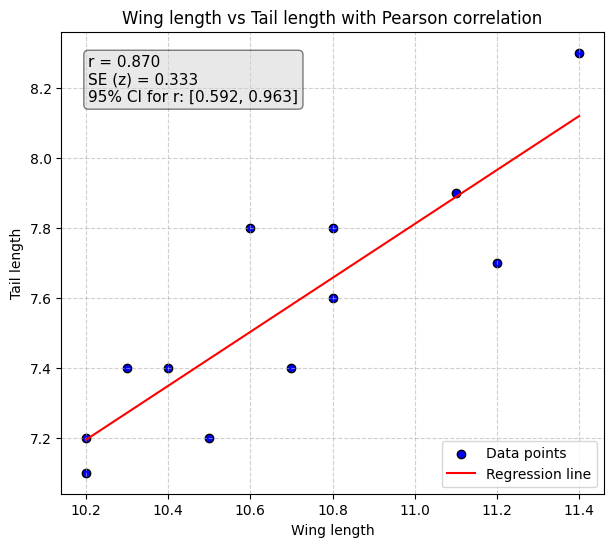

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
Y = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

n = len(X)

# Compute Pearson's r
r = np.corrcoef(X, Y)[0, 1]

# Fisher's z transformation
z = np.arctanh(r)

# Standard error of z
se_z = 1 / np.sqrt(n - 3)

# 95% CI for z
z_lower = z - 1.96 * se_z
z_upper = z + 1.96 * se_z

# Transform back to r
r_lower = np.tanh(z_lower)
r_upper = np.tanh(z_upper)

# Fit regression line
slope, intercept = np.polyfit(X, Y, 1)
line_x = np.linspace(min(X), max(X), 100)
line_y = slope * line_x + intercept

# Plot scatter and regression line
plt.figure(figsize=(7, 6))
plt.scatter(X, Y, color="blue", edgecolor="black", label="Data points")
plt.plot(line_x, line_y, color="red", label="Regression line")

# Add annotations
textstr = '\n'.join((
    f"r = {r:.3f}",
    f"SE (z) = {se_z:.3f}",
    f"95% CI for r: [{r_lower:.3f}, {r_upper:.3f}]"
))
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5))

# Labels & title
plt.xlabel("Wing length")
plt.ylabel("Tail length")
plt.title("Wing length vs Tail length with Pearson correlation")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


4) Should the value of r (X, Y) be considered significant at the p<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for Ho: r = 0.75?

In [ ]:
import numpy as np
from scipy.stats import norm

# Data
X = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
Y = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])
n = len(X)

# Observed correlation
r_obs = np.corrcoef(X, Y)[0, 1]

# Fisher z-transform
z_obs = np.arctanh(r_obs)
z_null = np.arctanh(0.75)

# Standard error
se = 1 / np.sqrt(n - 3)

# Test statistic
z_stat = (z_obs - z_null) / se

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print("Observed r:", r_obs)
print("Fisher z observed:", z_obs)
print("Fisher z null (r=0.75):", z_null)
print("Test statistic (z):", z_stat)
print("Two-tailed p-value:", p_value)

# we would conclude that the correlation is not significant at the p<0.05 level, since p-value > 0.05


Observed r: 0.8703545613058227
Fisher z observed: 1.334539983587134
Fisher z null (r=0.75): 0.9729550745276566
Test statistic (z): 1.0847547271784326
Two-tailed p-value: 0.27803030186088296


5) Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate

In [ ]:
from scipy.stats import t
import numpy as np

# Given values
r = 0.75
n = 12

# Compute t-statistic
t_stat = r * np.sqrt((n - 2) / (1 - r**2))

# Degrees of freedom
df = n - 2

# Two-tailed p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print("t-statistic:", t_stat)
print("Degrees of freedom:", df)
print("Two-tailed p-value:", p_value)

# Yale's value is not the same as ours, since our r is different from 0.75 and his is significant at a p-level of 0.05


t-statistic: 3.5856858280031805
Degrees of freedom: 10
Two-tailed p-value: 0.004964560270309448


6) Finally, calculate the statistical power and sample size needed to reject null that r = 0 when r is greater than or equal to 0.5

## Nonparametric Correlation Coefficient
* used for non-normally distrbuted variables
* non-parametric forms that compare paired values according to their ordinal scale
    1) Kendall rank correlation coefficient
    2) Spearman rank correlation coefficient
* typically yeild similar values, and can be used interchangeably
